# Libraries

In [1]:
# Import libraries
from bs4 import BeautifulSoup
import requests
import smtplib
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Web Scrape and Load

In [2]:
# Assign Url to a variable
cm_url = 'https://coinmarketcap.com/'

# Connect to website and download data and assign it to a variable (cm_t)
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36', 'Accept-Encoding':'gzip, deflate', 'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8', 'DNT':'1','Connection':'close', 'Upgrade-Insecure-Requests':'1'}
cm_page = requests.get(cm_url, headers=header)
cm_soup1 = BeautifulSoup(cm_page.content, 'html.parser')
cm_t = cm_soup1.find('table', {'class':'sc-beb003d5-3 ieTeVa cmc-table'}).find('tbody').find_all('tr')

In [3]:
# Creat empty list variables to contain respective headers/columns
name = []
price = []
market_cap = []
volume_24 = []
circulating_supply = []

# Creat a loop to represent number of rows of data/cryptocurrencies to be collected
ind = list(range(10))
for i in ind:
    #append data to respective containers
    name.append(cm_t[i].find('p', {'class':'ePTNty'}).get_text())
    price.append(cm_t[i].find('div', {'class':'sc-8bda0120-0 dskdZn'}).get_text())
    market_cap.append(cm_t[i].find('span', {'class':'sc-edc9a476-1 gqomIJ'}).get_text())
    volume_24.append(cm_t[i].find('p', {'class':'sc-e225a64a-0 gLNGkf font_weight_500'}).get_text())
    circulating_supply.append(cm_t[i].find('p', {'class':'sc-e225a64a-0 izpQLd'}).get_text())

In [4]:
# Creat headers for columns
    # name = Cryptocurrency name
    # Price_($) = current price in USD
    # market_cap_($) = Total worth of available cryptocurrency stock in USD
    # volume_($) = Total trade volume within 24hrs in USD
col = ['name', 'price ($)', 'market_cap ($)', 'volume_24 ($)']

#collect respective variables in a list
coins = [name, price, market_cap, volume_24]

#creat a pandas DataFrame with the name crypto_df
crypto_df = pd.DataFrame(coins)

# Mung

In [5]:
# Take a look at the dataframe
crypto_df.head()

,0,1,2,3,4,5,6,7,8,9
0,Bitcoin,Ethereum,Tether,BNB,USD Coin,XRP,Cardano,Polygon,Dogecoin,Binance USD
1,"$24,023.94","$1,665.82",$1.00,$308.26,$0.9983,$0.3717,$0.3448,$1.17,$0.07236,$0.9999
2,"$464,150,633,247","$203,836,531,892","$72,782,041,427","$48,641,152,263","$40,120,527,738","$18,938,408,344","$11,963,873,520","$10,186,696,478","$9,600,254,017","$8,375,262,593"
3,"$55,398,860,578","$18,942,447,805","$83,925,477,530","$1,208,875,847","$11,717,075,950","$1,892,322,364","$747,121,046","$1,097,669,731","$653,414,065","$11,612,596,454"


In [6]:
# Transpose the table to rearrange index and columns and columns as rows
crypto_df = crypto_df.T

In [7]:
# Add column names
crypto_df.columns = col

In [8]:
# Highlight the data again
crypto_df.head()

,name,price ($),market_cap ($),volume_24 ($)
0,Bitcoin,"$24,023.94","$464,150,633,247","$55,398,860,578"
1,Ethereum,"$1,665.82","$203,836,531,892","$18,942,447,805"
2,Tether,$1.00,"$72,782,041,427","$83,925,477,530"
3,BNB,$308.26,"$48,641,152,263","$1,208,875,847"
4,USD Coin,$0.9983,"$40,120,527,738","$11,717,075,950"


In [9]:
# Check data types
crypto_df.dtypes

name              object
price ($)         object
market_cap ($)    object
volume_24 ($)     object
dtype: object

In [10]:
# Use list comprehenssion to remove the $ from the figures 
crypto_df['price ($)'] = [i[1:] for i in crypto_df['price ($)']]
crypto_df['market_cap ($)'] = [i[1:] for i in crypto_df['market_cap ($)']]
crypto_df['volume_24 ($)'] = [i[1:] for i in crypto_df['volume_24 ($)']]

In [11]:
#Remove commar (,)
crypto_df['price ($)'] = [i.replace(',', '') for i in crypto_df['price ($)']]
crypto_df['market_cap ($)'] = [i.replace(',', '') for i in crypto_df['market_cap ($)']]
crypto_df['volume_24 ($)'] = [i.replace(',', '') for i in crypto_df['volume_24 ($)']]

In [12]:
# Change variable types to floats
crypto_df['price ($)'] = crypto_df['price ($)'].astype(float)
crypto_df['market_cap ($)'] = crypto_df['market_cap ($)'].astype(float)
crypto_df['volume_24 ($)'] = crypto_df['volume_24 ($)'].astype(float)

In [13]:
# Highlight the data and check datatypes to confirm cleanup 
print(crypto_df.head())
print('')
print('')
print(crypto_df.dtypes)

       name   price ($)  market_cap ($)  volume_24 ($)
0   Bitcoin  24023.9400    4.641506e+11   5.539886e+10
1  Ethereum   1665.8200    2.038365e+11   1.894245e+10
2    Tether      1.0000    7.278204e+10   8.392548e+10
3       BNB    308.2600    4.864115e+10   1.208876e+09
4  USD Coin      0.9983    4.012053e+10   1.171708e+10


name               object
price ($)         float64
market_cap ($)    float64
volume_24 ($)     float64
dtype: object


# Visualise

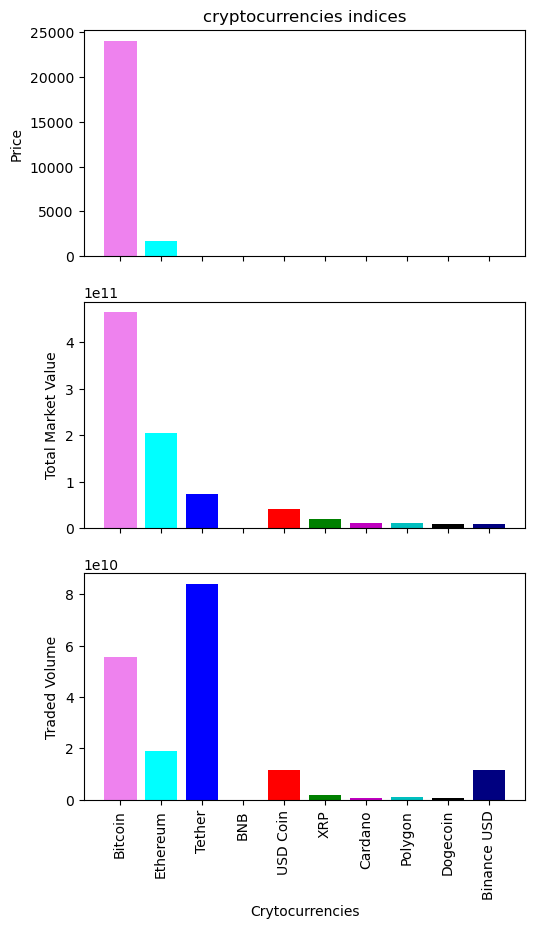

In [14]:
# Creat figure and respective axes
fig1, axes = plt.subplots(3, 1, figsize=(5.7,10), sharex=True)

#Creat plots
axes[0].bar(crypto_df['name'], crypto_df['price ($)'], data=crypto_df, color=('violet', 'aqua', 'b', 'w', 'r', 'g', 'm', 'c', 'k', 'navy'))
axes[1].bar(crypto_df['name'], crypto_df['market_cap ($)'], data=crypto_df, color=('violet', 'aqua', 'b', 'w', 'r', 'g', 'm', 'c', 'k', 'navy'))
axes[2].bar(crypto_df['name'], crypto_df['volume_24 ($)'], data=crypto_df, color=('violet', 'aqua', 'b', 'w', 'r', 'g', 'm', 'c', 'k', 'navy'))

# Add features and labels
plt.xticks(rotation = 90)
plt.xlabel('Crytocurrencies')
axes[0].set_ylabel('Price')
axes[1].set_ylabel('Total Market Value')
axes[2].set_ylabel('Traded Volume')
axes[0].set_title('cryptocurrencies indices')

plt.show()

(0.0, 5.0)

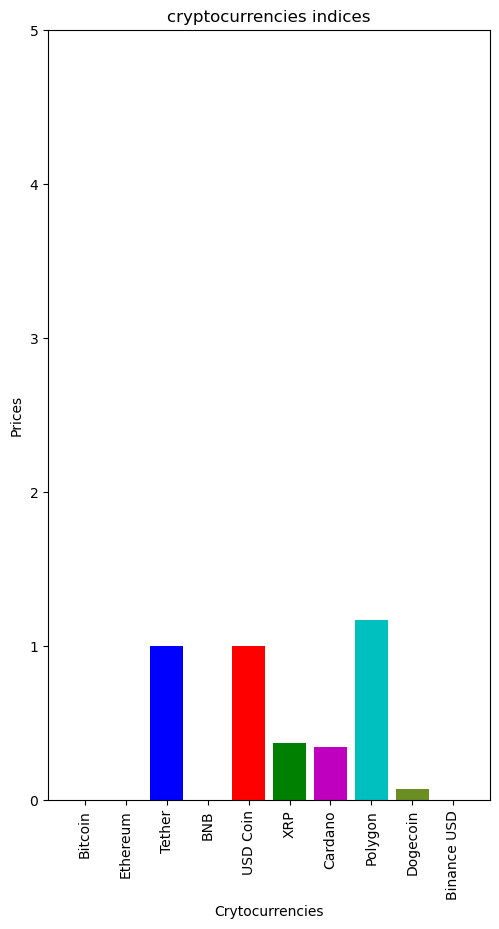

In [15]:
# creat another plot to highlight some prices
fig1, axes = plt.subplots(figsize=(5.7,10))

#Creat plots
axes.bar(crypto_df['name'], crypto_df['price ($)'], color=('w', 'w', 'b', 'w', 'r', 'g', 'm', 'c', 'olivedrab', 'w'))
plt.xticks(rotation = 90)
plt.xlabel('Crytocurrencies')
plt.ylabel('Prices')
plt.title('cryptocurrencies indices')
plt.ylim(0, 5)